In [1]:
import math
import os

## PART ONE IMPORTS 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from scipy.stats import variation 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

## PART TWO IMPORTS 

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn import model_selection
import weka.core.jvm as jvm
from weka.core.classes import Random
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.classifiers import Classifier
import weka.plot.classifiers as plcls
from xgboost import XGBRegressor



### 1. (a) import the community data, split into train and test set

In [2]:
columns=["state","county","community" ,"communityname","fold","population","householdsize" ,"racepctblack" ,"racePctWhite","racePctAsian" ,"racePctHisp" ,"agePct12t21" ,"agePct12t29" ,"agePct16t24" ,"agePct65up","numbUrban","pctUrban" ,"medIncome" ,"pctWWage" ,"pctWFarmSelf" ,"pctWInvInc",'pctWSocSez',"pctWPubAsst" ,'pctWRetire',"medFamInc" ,"perCapInc" ,"whitePerCap" ,"blackPerCap","indianPerCap" ,"AsianPerCap","OtherPerCap" ,"HispPerCap","NumUnderPov" ,"PctPopUnderPov","PctLess9thGrade" ,"PctNotHSGrad" ,"PctBSorMore", "PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par", "PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10", "PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]

df = pd.read_csv('../data/communities.data')
df.columns = columns
df = df.drop(columns=['state','county', 'community','communityname', 'fold'])
df = df.replace('?', np.nan)
train = df.head(1495)
test = df.tail(df.shape[0]-1495)
columns = ["population","householdsize" ,"racepctblack" ,"racePctWhite","racePctAsian" ,"racePctHisp" ,"agePct12t21" ,"agePct12t29" ,"agePct16t24" ,"agePct65up","numbUrban","pctUrban" ,"medIncome" ,"pctWWage" ,"pctWFarmSelf" ,"pctWInvInc",'pctWSocSez',"pctWPubAsst" ,'pctWRetire',"medFamInc" ,"perCapInc" ,"whitePerCap" ,"blackPerCap","indianPerCap" ,"AsianPerCap","OtherPerCap" ,"HispPerCap","NumUnderPov" ,"PctPopUnderPov","PctLess9thGrade" ,"PctNotHSGrad" ,"PctBSorMore", "PctUnemployed","PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce","MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par", "PctKids2Par","PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg","NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig","PctRecImmig5","PctRecImmig8","PctRecImmig10", "PctSpeakEnglOnly","PctNotSpeakEnglWell","PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous","PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup","PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb","OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent","MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet","PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT","LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop","PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz","PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg","LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop"]

train


population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.00           0.16          0.12          0.74          0.45   
1           0.00           0.42          0.49          0.56          0.17   
2           0.04           0.77          1.00          0.08          0.12   
3           0.01           0.55          0.02          0.95          0.09   
4           0.02           0.28          0.06          0.54          1.00   
...          ...            ...           ...           ...           ...   
1490        0.16           0.62          0.03          0.74          0.48   
1491        0.01           0.36          0.95          0.24          0.03   
1492        0.06           0.53          0.01          0.98          0.05   
1493        0.05           0.43          0.08          0.65          0.12   
1494        0.00           0.20          0.03          0.91          0.23   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0            0.07         0.26         0.59         0.35        0.27  ...   
1            0.04         0.39         0.47         0.28        0.32  ...   
2            0.10         0.51         0.50         0.34        0.21  ...   
3            0.05         0.38         0.38         0.23        0.36  ...   
4            0.25         0.31         0.48         0.27        0.37  ...   
...           ...          ...          ...          ...         ...  ...   
1490         0.42         0.44         0.57         0.40        0.25  ...   
1491         0.01         0.44         0.42         0.27        0.63  ...   
1492         0.01         0.40         0.40         0.24        0.29  ...   
1493         1.00         0.37         0.52         0.33        0.44  ...   
1494         0.05         0.15         0.19         0.09        0.42  ...   

      LandArea  PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  \
0         0.02     0.12            0.45        NaN            NaN   
1         0.01     0.21            0.02        NaN            NaN   
2         0.02     0.39            0.28        NaN            NaN   
3         0.04     0.09            0.02        NaN            NaN   
4         0.01     0.58            0.10        NaN            NaN   
...        ...      ...             ...        ...            ...   
1490      0.07     0.40            0.14       0.07           0.05   
1491      0.03     0.12            0.01        NaN            NaN   
1492      0.08     0.15            0.02        NaN            NaN   
1493      0.00     1.00            1.00          0           0.01   
1494      0.01     0.23            0.73        NaN            NaN   

      LemasPctPolicOnPatr  LemasGangUnitDeploy  LemasPctOfficDrugUn  \
0                     NaN                  NaN                 0.00   
1                     NaN                  NaN                 0.00   
2                     NaN                  NaN                 0.00   
3                     NaN                  NaN                 0.00   
4                     NaN                  NaN                 0.00   
...                   ...                  ...                  ...   
1490                 0.85                  0.5                 0.61   
1491                  NaN                  NaN                 0.00   
1492                  NaN                  NaN                 0.00   
1493                 0.77                    0                 0.51   
1494                  NaN                  NaN                 0.00   

      PolicBudgPerPop  ViolentCrimesPerPop  
0                 NaN                 0.67  
1                 NaN                 0.43  
2                 NaN                 0.12  
3                 NaN                 0.03  
4                 NaN                 0.14  
...               ...                  ...  
1490             0.19                 0.20  
1491              NaN                 0.30  
1492              NaN                 0.03  
1493             0.18   

### 1. (b) deal with the missing values in the data set

In [3]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train)
test = pd.DataFrame(imputer.transform(test))
train = pd.DataFrame(imputer.transform(train))
test.columns = columns
train.columns = columns

print(train)

# missing_data_cols = []
# for col in train.columns:
#     nan=False
#     for data in train[col]:
#         if data is np.nan:
#             nan=True
#             break
#     if nan > 0: 
#         missing_data_cols.append(col)
    
# valid_df = train.dropna()
# # print(valid_df)
# new_rows = []
# for col in missing_data_cols:
#     X_train = valid_df.drop(columns=[col])
#     y_train = valid_df[col]
#     temp_cols = columns.copy()
#     temp_cols.remove(col)
#     X_test = pd.DataFrame(columns=temp_cols)
    
#     ## Find rows with missing values 
#     for row in range(0, len(df)):
#         if df[col][row] is np.nan:
#             X_test = pd.concat([X_test, df.loc[[row], columns].drop(columns=[col])])
#     knn = KNeighborsClassifier(n_neighbors=3)
#     knn = knn.fit(X_train, y_train)
    
#     for index, row in X_test.iterrows():
#         row = row.fillna(0)
#         df.at[index, col] = np.float64(knn.predict([row])[0])
# train = df.head(1495)
# test = df.tail(df.shape[0]-1495)

# for row in range(0, train.shape[1]):
#     for col in train.columns:
#         if type(train.at[row, col]) == type(''):
#             train.at[row, col] = np.float64(train.at[row, col])
# train

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.00           0.16          0.12          0.74          0.45   
1           0.00           0.42          0.49          0.56          0.17   
2           0.04           0.77          1.00          0.08          0.12   
3           0.01           0.55          0.02          0.95          0.09   
4           0.02           0.28          0.06          0.54          1.00   
...          ...            ...           ...           ...           ...   
1490        0.16           0.62          0.03          0.74          0.48   
1491        0.01           0.36          0.95          0.24          0.03   
1492        0.06           0.53          0.01          0.98          0.05   
1493        0.05           0.43          0.08          0.65          0.12   
1494        0.00           0.20          0.03          0.91          0.23   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

### 1 (c) Plot a correlation matrix for the features in the data set.

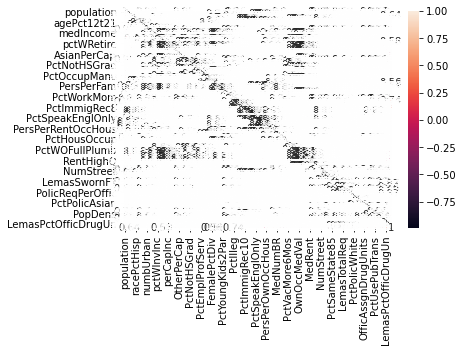

<Figure size 2880x1440 with 0 Axes>

In [4]:
corrMatrix = train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(40,20))
plt.show()

### 1. (e) Calculate the Coefficient of Variation CV for each feature

In [5]:
def coef_var(col):
    summ=0
    for val in train[col]:
        summ += np.float64(val)
    mean = summ/len(train[col])
    stdsum=0
    for val in train[col]:
        stdsum += (mean-np.float64(val))**2
    std = math.pow(stdsum/len(train[col]), 0.5)
    return std/mean


cv = []
for col in train.columns:
    cv.append(coef_var(col))
    print("CV of " + col + ": " + str(coef_var(col)))
    


CV of population: 2.244640606841128
CV of householdsize: 0.35597306691266795
CV of racepctblack: 1.428331905350225
CV of racePctWhite: 0.3301047133884417
CV of racePctAsian: 1.3580437028210843
CV of racePctHisp: 1.6125273981168395
CV of agePct12t21: 0.3694130203190467
CV of agePct12t29: 0.29175833423400416
CV of agePct16t24: 0.5006877042794514
CV of agePct65up: 0.41252179188498905
CV of numbUrban: 2.04093856681854
CV of pctUrban: 0.6431029790755557
CV of medIncome: 0.5919842464160718
CV of pctWWage: 0.3285251059182337
CV of pctWFarmSelf: 0.7016998838879909
CV of pctWInvInc: 0.36551566546369924
CV of pctWSocSez: 0.36045867285760186
CV of pctWPubAsst: 0.7060646670164001
CV of pctWRetire: 0.34526707555623815
CV of medFamInc: 0.5409742485275039
CV of perCapInc: 0.5592939033450041
CV of whitePerCap: 0.5209642160362763
CV of blackPerCap: 0.5997834416714559
CV of indianPerCap: 0.8182479966812636
CV of AsianPerCap: 0.6145032256689829
CV of OtherPerCap: 0.6735425521952506
CV of HispPerCap: 0.48

### 1. (e) Pick b √128 c features with highest CV, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots

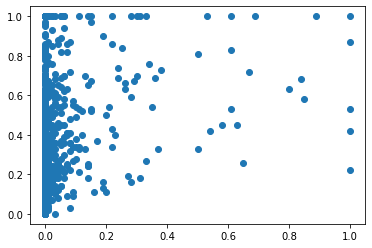

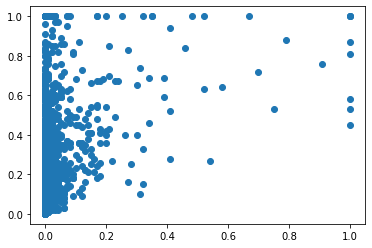

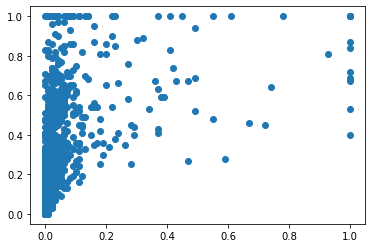

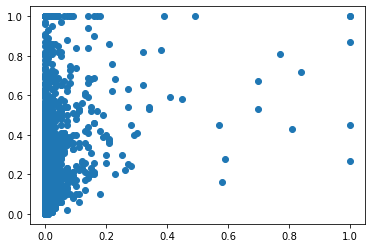

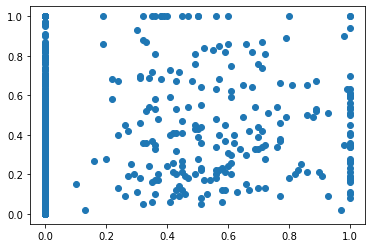

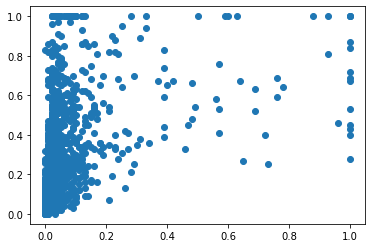

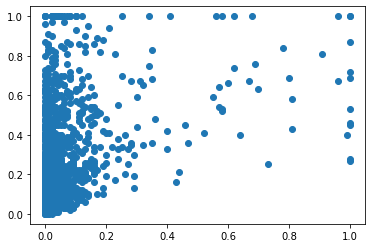

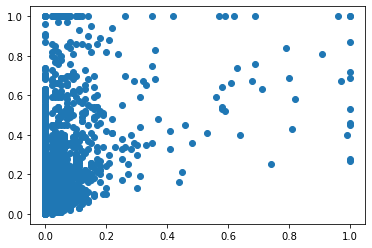

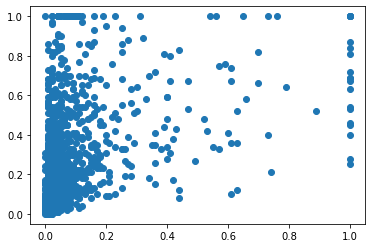

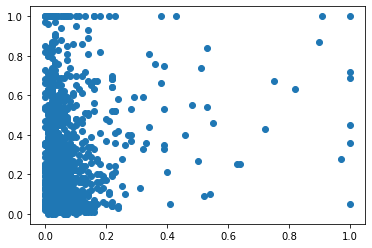

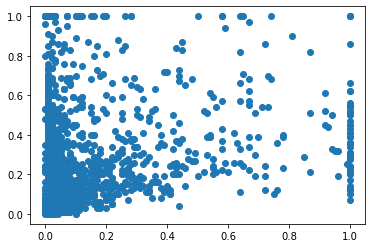

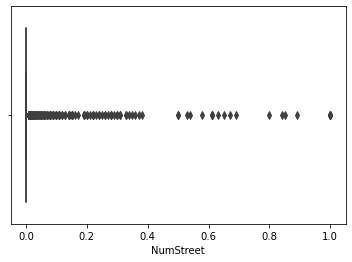

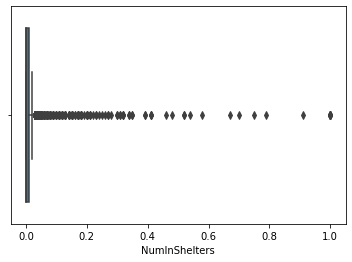

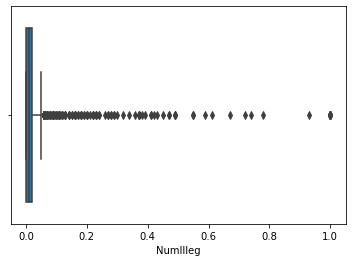

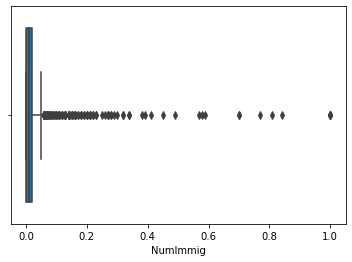

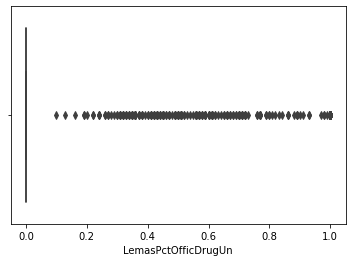

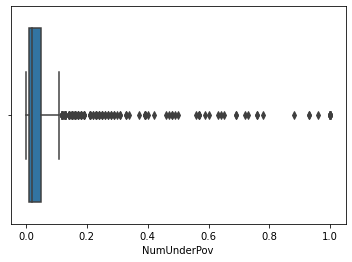

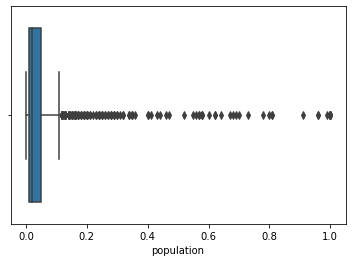

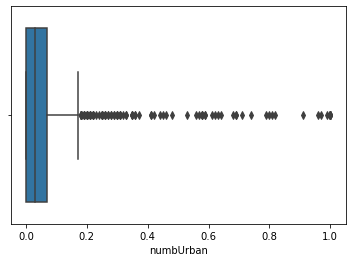

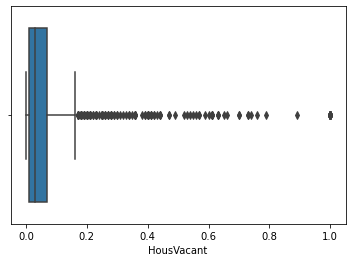

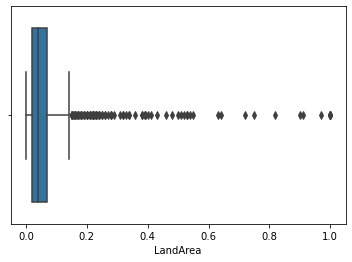

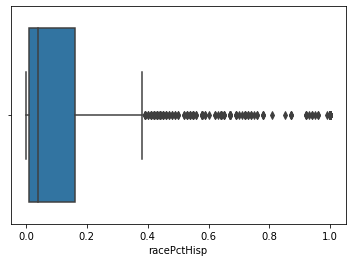

In [14]:
num_feat = math.floor(math.pow(128, 0.5))
top_indices = np.array(cv).argsort()[-num_feat:][::-1]
top_indices
top_features=[]
for index in top_indices:
#     temp = train[columns[index]]
#     print(type(temp))
#     print(train[columns[index]])
    top_features.append(columns[index])
    plt.scatter(train[columns[index]], train['ViolentCrimesPerPop'])
    plt.show()
#     sn.boxplot(x="independent variables", hue="class", y="value", data=train[columns[index]], showmeans=True)

for feature in top_features:
    ax = sn.boxplot(train[feature])
    plt.show()
# top_features


# top_features_df = train[top_features]
# top_features_df


In [13]:
top_features

[]

### From the scatterplots, it seems that these features have many zeros and no visible trend. It seems that these features are not precise, and would possibly get removed via feature selection.

### 1. (f) Fit a linear model using least squares to the training set and report the test error.


In [93]:
X_train = train.drop(columns=['ViolentCrimesPerPop'])
y_train = train['ViolentCrimesPerPop']
lr = LinearRegression()
lr.fit(X_train, y_train)

X_test = test.drop(columns=['ViolentCrimesPerPop'])
predictions = lr.predict(X_test)
y_test = test['ViolentCrimesPerPop']
print("test error:", mean_squared_error(y_test.to_numpy(), predictions))

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.00           0.16          0.12          0.74          0.45   
1           0.00           0.42          0.49          0.56          0.17   
2           0.04           0.77          1.00          0.08          0.12   
3           0.01           0.55          0.02          0.95          0.09   
4           0.02           0.28          0.06          0.54          1.00   
...          ...            ...           ...           ...           ...   
1490        0.16           0.62          0.03          0.74          0.48   
1491        0.01           0.36          0.95          0.24          0.03   
1492        0.06           0.53          0.01          0.98          0.05   
1493        0.05           0.43          0.08          0.65          0.12   
1494        0.00           0.20          0.03          0.91          0.23   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

### 1. (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained

In [94]:
ridgereg = RidgeCV(alphas=[0.0001,0.001,0.01,1.0,0.1,10,100,1000])
ridgereg = ridgereg.fit(X_train, y_train)
print("chosen lambda: ",ridgereg.alpha_)
predictions = ridgereg.predict(X_test)
print("test error:", mean_squared_error(y_test.to_numpy(), predictions))

chosen lambda:  1.0
test error: 0.017769273495054024


### 1. (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model.

In [95]:


lassoreg = LassoCV(alphas=[0.00001,0.0001,0.001,0.01,1.0,0.1,10,100,1000], max_iter=10000)
lassoreg = lassoreg.fit(X_train, y_train)
print("chosen lambda: ",lassoreg.alpha_)
predictions = lassoreg.predict(X_test)
print("test error:", mean_squared_error(y_test.to_numpy(), predictions))
coef_used = list(lassoreg.coef_!=0)
num_var = np.sum(lassoreg.coef_!=0)
print("Number of variables used", num_var)
temp = columns.copy()
temp.remove('ViolentCrimesPerPop')
features = np.array(temp)[coef_used]
features

chosen lambda:  0.0001
test error: 0.017818165592903164
Number of variables used 79


array(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSez', 'pctWPubAsst', 'pctWRetire', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore',
       'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg',
       'PctIlleg', 'NumImmig', 'PctImmigRec10', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous',
       'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR',
       'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded',
       'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone',
       'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent',
       'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPc

### Repeat with standardized features. Report the test error for both cases and compare them. 


In [96]:
scaler = StandardScaler()
scaler.fit(X_train)
st_X_train = scaler.transform(X_train)
scaler.fit(X_test)
sc_X_test = scaler.transform(X_test)
lassoreg = LassoCV(alphas=[0.00001,0.0001,0.001,0.01,1.0,0.1,10,100,1000], max_iter=10000)
lassoreg = lassoreg.fit(st_X_train, y_train)
print("chosen lambda: ",lassoreg.alpha_)
predictions = lassoreg.predict(sc_X_test)
print("(Standardized) test error:", mean_squared_error(y_test.to_numpy(), predictions))
coef_used = list(lassoreg.coef_!=0)
num_var = np.sum(lassoreg.coef_!=0)
print("Number of variables used", num_var)
temp = columns.copy()
temp.remove('ViolentCrimesPerPop')
features = np.array(temp)[coef_used]
features

chosen lambda:  0.001
(Standardized) test error: 0.01796843960472161
Number of variables used 68


array(['racepctblack', 'agePct12t21', 'agePct12t29', 'pctUrban',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSez',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg',
       'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctRecImmig10',
       'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PctPersOwnOccup',
       'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc',
       'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters',
       'NumStreet', 'PctForeignBorn', 'PctSameCity85',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'PolicReqPer

### After standardizing the data, the test error increased slightly, the number of features selected dropped by 20%, and the lambda value chosen is a larger value.

### 1 (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained

In [97]:

## http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html

X_train=train.drop(columns=['ViolentCrimesPerPop'])
y_train=train['ViolentCrimesPerPop']
X_test = test.drop(columns=['ViolentCrimesPerPop'])
y_test = test['ViolentCrimesPerPop']
pca = PCA()
X_reduced = pca.fit_transform(scale(X_train))
n = len(X_reduced)
M = X_reduced.shape[1]

kf = model_selection.KFold( n_splits=10, shuffle=True, random_state=0)
regr = LinearRegression()
mse = []

score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf, scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, M+1):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y_train.ravel(), cv=kf, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
bestM = np.array(mse).argsort()[:1][::-1][0]
print("Best M:", bestM, '\n', "MSE:", mse[bestM])

95
Best M: 95 
 MSE: 0.019484724194622067


In [98]:
pca2 = PCA()

X_reduced_train = pca2.fit_transform(scale(X_train))
X_reduced_test = pca2.transform(scale(X_test))[:,:bestM]
regr = LinearRegression()
regr.fit(X_reduced_train[:,:bestM], y_train)
pred = regr.predict(X_reduced_test)
print("Test Error", mean_squared_error(y_test, pred))

Test Error 0.01876219546122888


### Use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation

In [99]:
model = XGBRegressor(objective="reg:squarederror")
# model.fit(X_train, y_train)
crossval = GridSearchCV(model, param_grid={'reg_alpha':[0.001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})
crossval = crossval.fit(X_train, y_train)

In [100]:
print("α from cross-validation:", crossval.best_params_['reg_alpha'])

α from cross-validation: 1


### 2. Tree-Based Methods
### (a) Download the APS Failure data

In [101]:
test = pd.read_csv('../data/aps_failure_test_set.csv')
train = pd.read_csv('../data/aps_failure_training_set.csv')
train['class'] = train['class'].map({'neg': 0, 'pos': 1})
test['class'] = test['class'].map({'neg': 0, 'pos': 1})
orig_col = train.columns
train = train.replace('na', np.nan)
test = test.replace('na', np.nan)

### (b) Data Preparation


In [102]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(train)
test = pd.DataFrame(imputer.transform(test))
train = pd.DataFrame(imputer.transform(train))
test.columns = orig_col
train.columns = orig_col

In [103]:
train

class    aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0        0.0   76698.0     0.0  2.130706e+09   280.0     0.0     0.0     0.0   
1        0.0   33058.0     0.0  0.000000e+00   126.0     0.0     0.0     0.0   
2        0.0   41040.0     0.0  2.280000e+02   100.0     0.0     0.0     0.0   
3        0.0      12.0     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4        0.0   60874.0     0.0  1.368000e+03   458.0     0.0     0.0     0.0   
...      ...       ...     ...           ...     ...     ...     ...     ...   
59995    0.0  153002.0     0.0  6.640000e+02   186.0     0.0     0.0     0.0   
59996    0.0    2286.0     0.0  2.130707e+09   224.0     0.0     0.0     0.0   
59997    0.0     112.0     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998    0.0   80292.0     0.0  2.130706e+09   494.0     0.0     0.0     0.0   
59999    0.0   40222.0     0.0  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

### (b) ii Calculate the Coefficient of Variation for each feature



In [104]:
cv = []
for column in train.columns:
    if column != 'class':
        cv.append(coef_var(column))
        print("CV of " + column + ": " + str(round(coef_var(column),2)))

CV of aa_000: 2.45
CV of ab_000: 10.38
CV of ac_000: 2.31
CV of ad_000: 244.32
CV of ae_000: 24.2
CV of af_000: 19.47
CV of ag_000: 92.92
CV of ag_001: 35.25
CV of ag_002: 17.57
CV of ag_003: 8.65
CV of ag_004: 5.46
CV of ag_005: 2.96
CV of ag_006: 2.36
CV of ag_007: 2.86
CV of ag_008: 6.22
CV of ag_009: 33.36
CV of ah_000: 2.31
CV of ai_000: 18.2
CV of aj_000: 44.27
CV of ak_000: 80.42
CV of al_000: 9.17
CV of am_0: 9.16
CV of an_000: 2.25
CV of ao_000: 2.27
CV of ap_000: 3.08
CV of aq_000: 2.86
CV of ar_000: 11.35
CV of as_000: 87.33
CV of at_000: 23.71
CV of au_000: 68.88
CV of av_000: 6.01
CV of ax_000: 4.02
CV of ay_000: 37.43
CV of ay_001: 52.82
CV of ay_002: 39.25
CV of ay_003: 28.73
CV of ay_004: 33.75
CV of ay_005: 12.52
CV of ay_006: 3.05
CV of ay_007: 3.31
CV of ay_008: 3.82
CV of ay_009: 84.73
CV of az_000: 9.41
CV of az_001: 7.72
CV of az_002: 13.27
CV of az_003: 7.53
CV of az_004: 2.85
CV of az_005: 3.03
CV of az_006: 8.88
CV of az_007: 16.23
CV of az_008: 22.68
CV of az_

### (b) iii Plot a correlation matrix for the features in the data set.


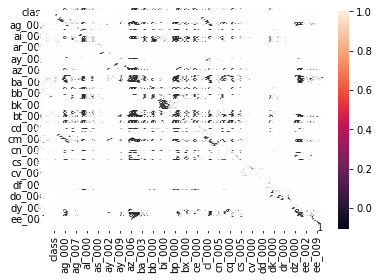

<Figure size 2880x1440 with 0 Axes>

In [105]:
corrMatrix = train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(figsize=(40,20))
plt.show()


### (b) iv Pick √170 features with highest CV, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

The variance doesn't seem that high, compared to the variance in Part 1, so it's likely that these features will be more significant in this model. There are also few high values in this dataset 

['ce_000', 'cn_009', 'ac_000', 'cs_008', 'dg_000', 'di_000', 'af_000', 'ar_000', 'ay_008', 'aj_000', 'az_008', 'cg_000', 'at_000', 'class']


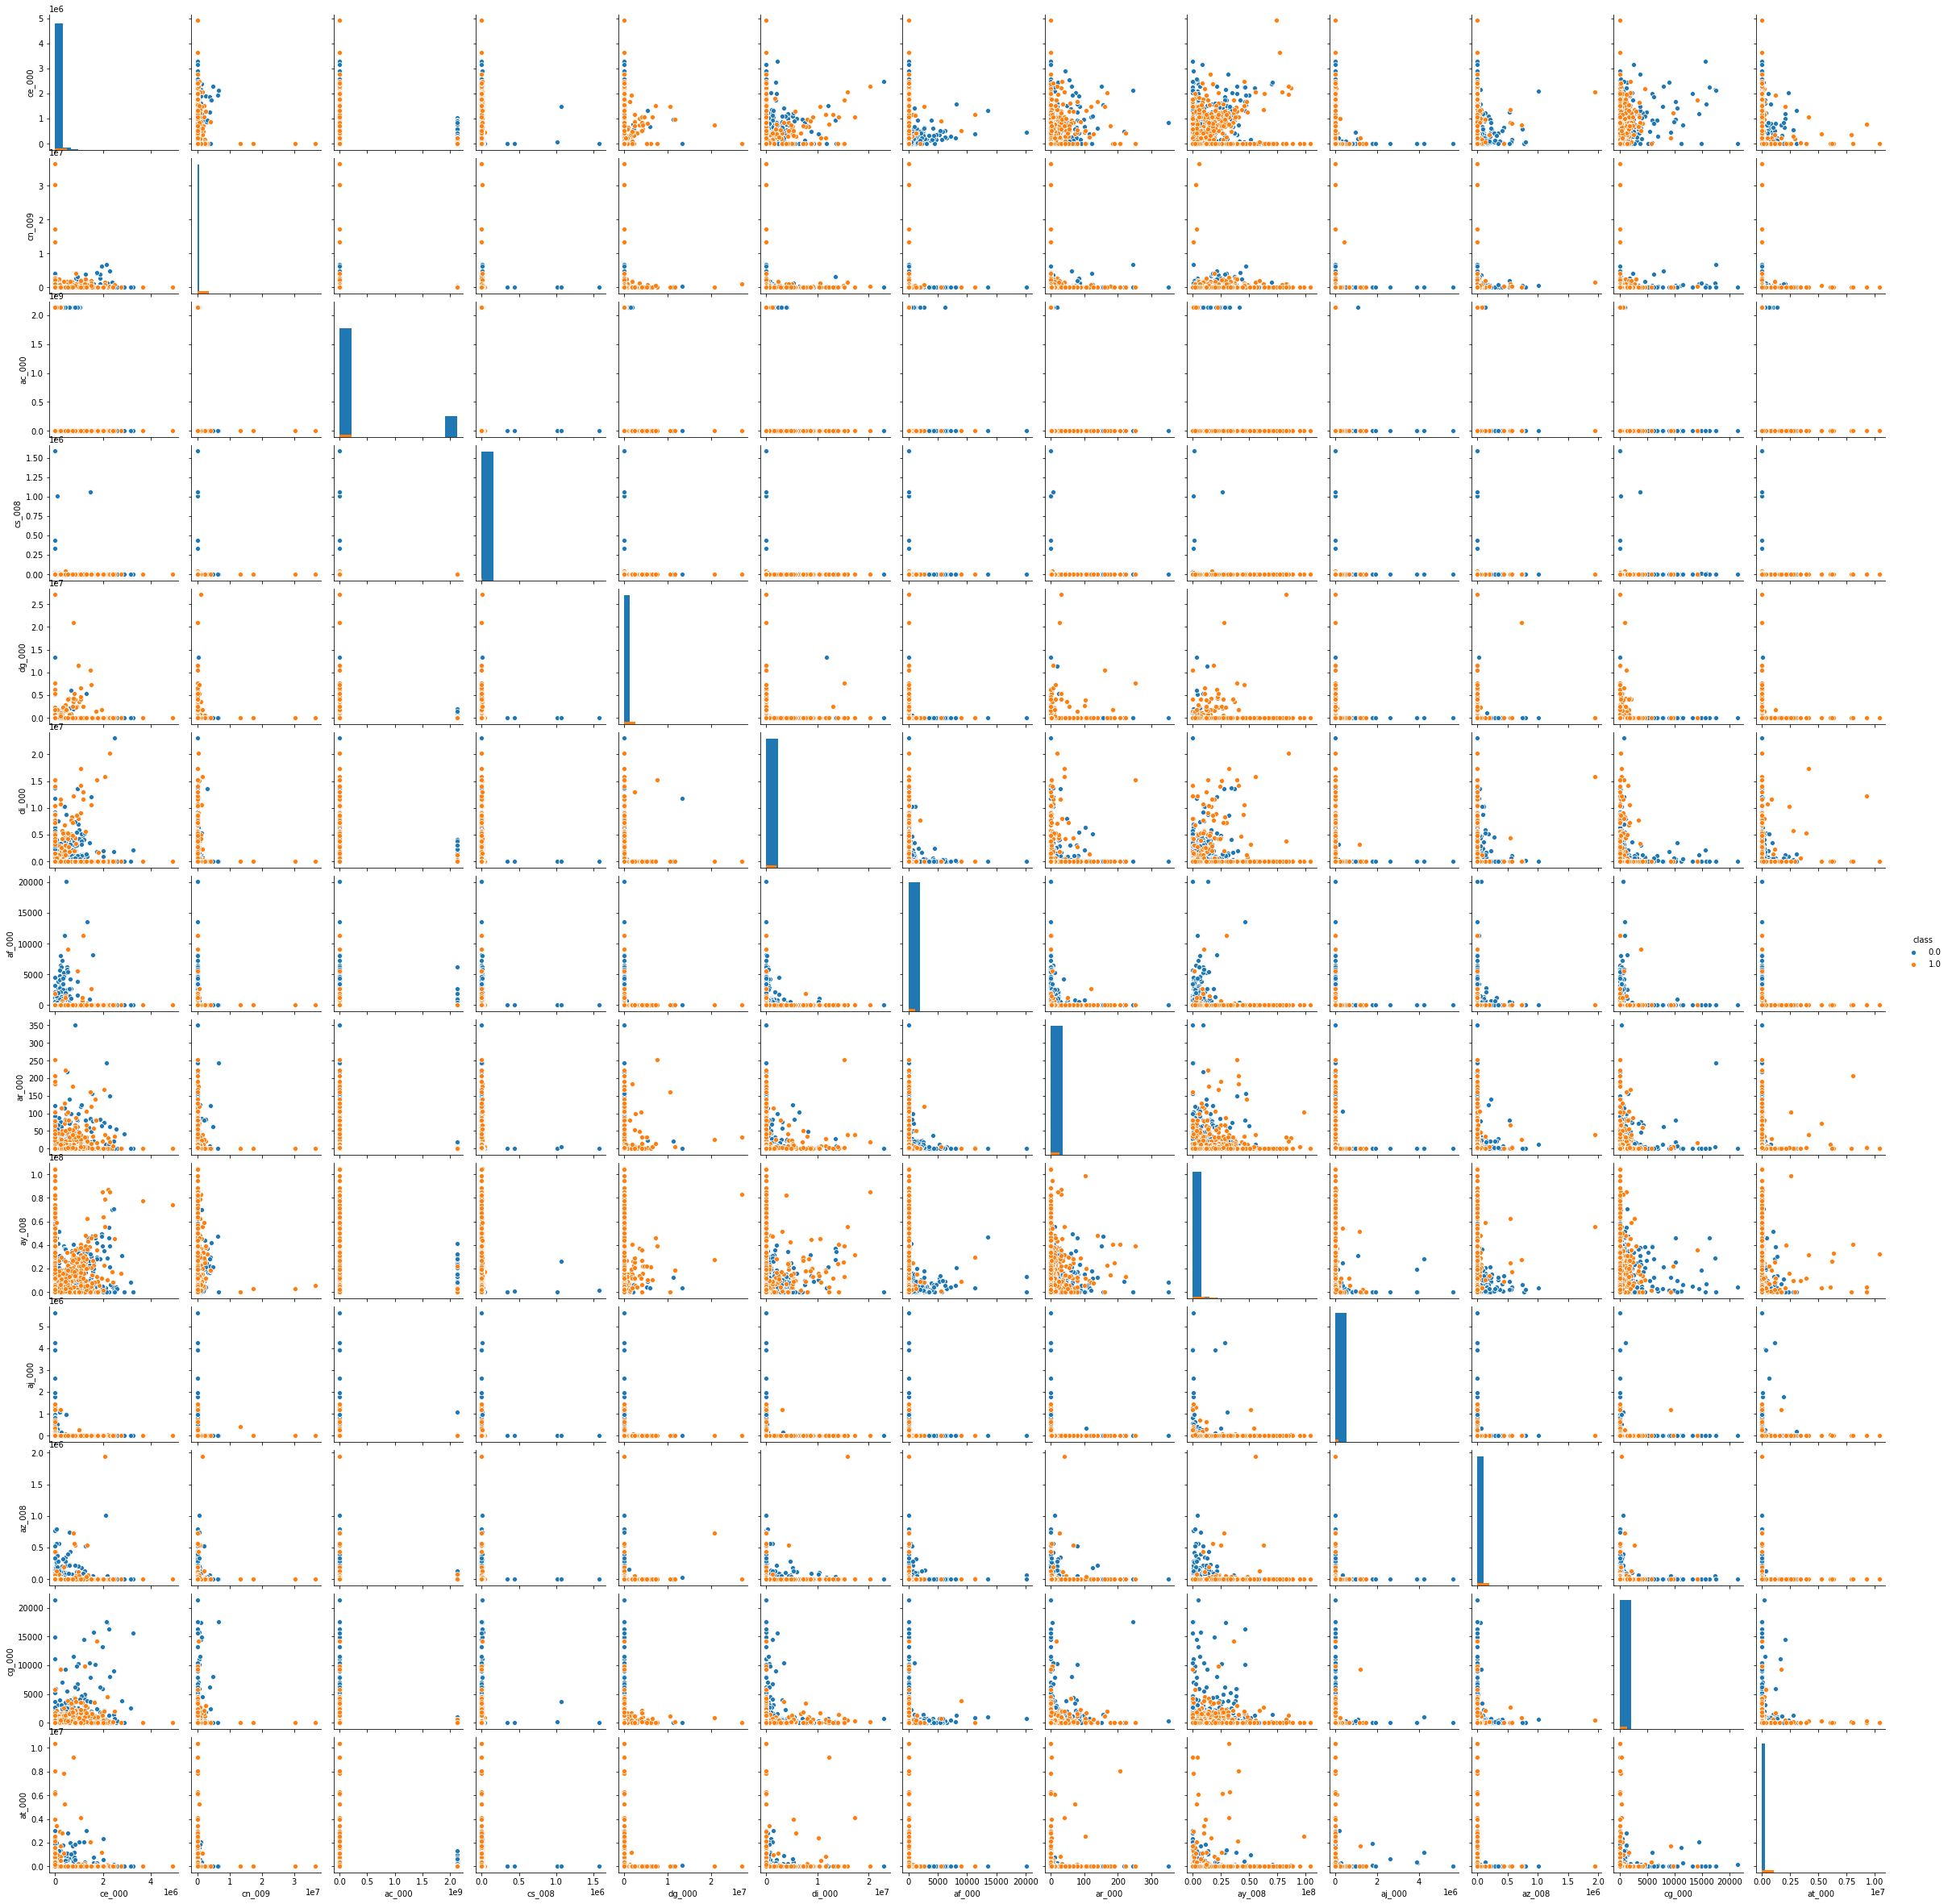

In [106]:
num_features = math.floor(math.sqrt(170))
top_indices = np.array(cv).argsort()[-num_features:][::-1]
top_indices
top_features=[]
columns = list(train.columns)
for index in top_indices:
    top_features.append(columns[index])
top_features.append('class')
print(top_features)
sn.pairplot(train[top_features], hue='class', diag_kind='hist')

plt.show()

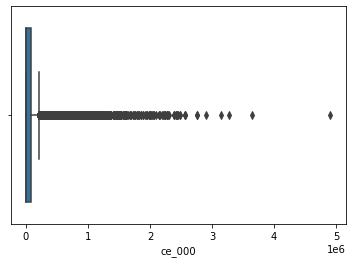

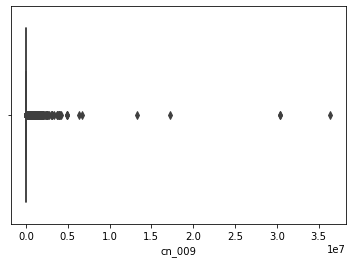

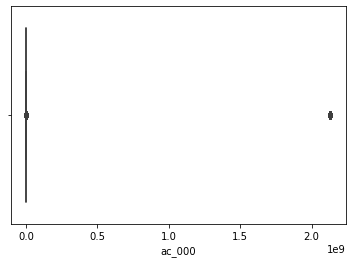

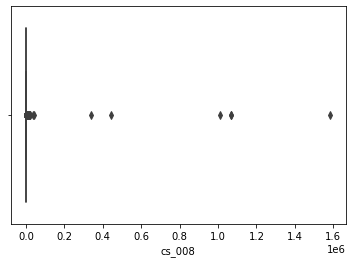

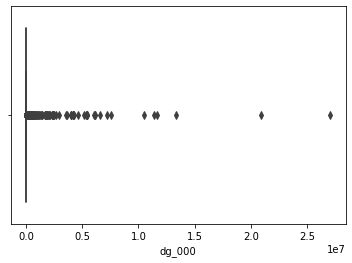

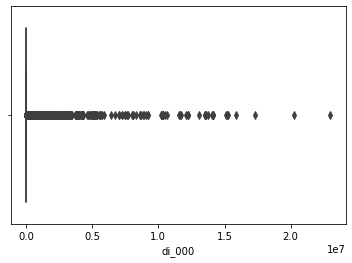

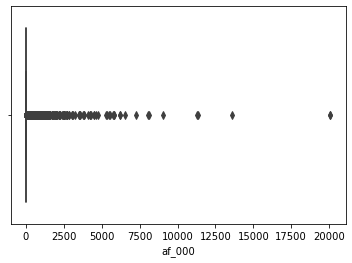

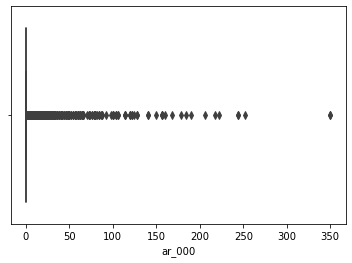

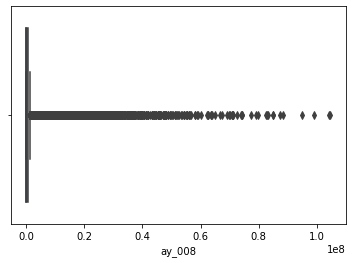

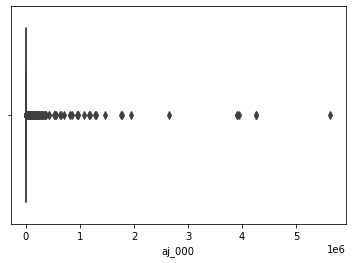

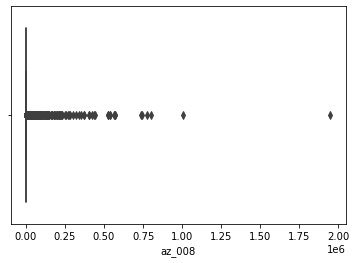

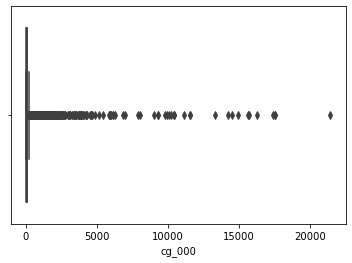

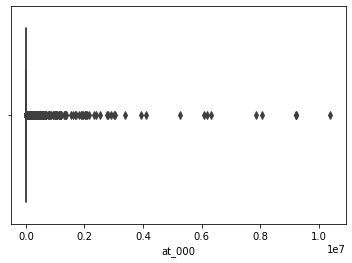

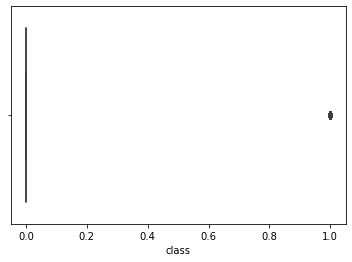

In [107]:
for feature in top_features:
    ax = sn.boxplot(x=train[feature])
    plt.show()

### (b) v Determine the number of positive and negative data. Is this data set imbalanced? 
Yes the data set is very imbalanced. 1000 'pos' class and 59000 'neg' class

In [108]:
train['class'].value_counts()

0.0    59000
1.0     1000
Name: class, dtype: int64

### (c) Train a random forest to classify the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them. Calculate Out of Bag error estimate for your random forest and compare it to the test error.

The OOB error estimate is just slightly less than the test error

In [109]:
rfc = RandomForestClassifier(oob_score=True)
X_train = train.drop(columns=['class'])
y_train = train['class']
X_test = test.drop(columns=['class'])
y_test = test['class']
rfc.fit(X_train, y_train)
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)


--- Train ---
AUC: 1.0
Misclassification: 0.0
Confusion Matrix: 
 [[59000     0]
 [    0  1000]]


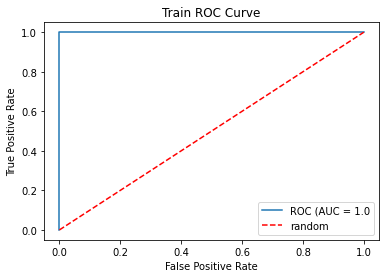



--- Test ---
AUC: 0.85
Misclassification: 0.00794
Confusion Matrix: 
 [[15608    17]
 [  110   265]]


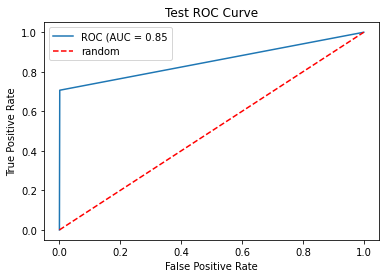



OOB Error 0.00628


In [110]:
print("--- Train ---")
auc = round(roc_auc_score(y_train, train_pred),2)

print("AUC:", round(roc_auc_score(y_train, train_pred),4))
print("Misclassification:", round(1-accuracy_score(y_train, train_pred),5))
print("Confusion Matrix: \n", confusion_matrix(y_train, train_pred))
fpr, tpr, thresholds = roc_curve(y_train, train_pred)
plt.plot(fpr, tpr, label="ROC (AUC = " + str(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='random')
plt.title("Train ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('\n\n--- Test ---')
auc = round(roc_auc_score(y_test, test_pred),2)
print("AUC:", auc)
print("Misclassification:", round(1-accuracy_score(y_test, test_pred),5))
print("Confusion Matrix: \n", confusion_matrix(y_test, test_pred))
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
plt.plot(fpr, tpr, label="ROC (AUC = " + str(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='random')
plt.title("Test ROC Curve")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.show()
print("\n\nOOB Error", round(1 - rfc.oob_score_,5))





### (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

The compensated random forest classifier performs slightly worse than the imbalanced Random forest classifier.

--- Train ---
AUC: 1.0
Misclassification: 0.0
Confusion Matrix: 
 [[59000     0]
 [    0  1000]]


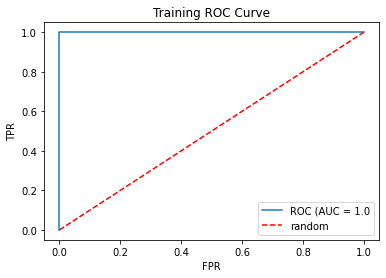



--- Test ---
AUC: 0.79
Misclassification: 0.011
Confusion Matrix: 
 [[15608    17]
 [  159   216]]


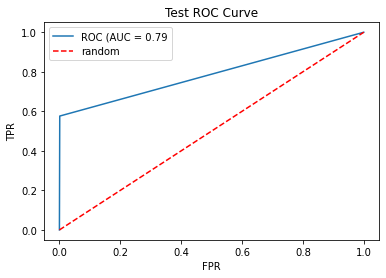



OOB Error 0.00772


In [111]:
rfc = RandomForestClassifier(oob_score=True, class_weight="balanced")

rfc.fit(X_train, y_train)
train_pred = rfc.predict(X_train)
test_pred = rfc.predict(X_test)

print("--- Train ---")
auc = round(roc_auc_score(y_train, train_pred),4)
print("AUC:", round(roc_auc_score(y_train, train_pred),4))
print("Misclassification:", round(1-accuracy_score(y_train, train_pred),5))
print("Confusion Matrix: \n", confusion_matrix(y_train, train_pred))

fpr, tpr, thresholds = roc_curve(y_train, train_pred)
plt.plot(fpr, tpr, label="ROC (AUC = " + str(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="random")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Training ROC Curve")
plt.legend()
plt.show()
print('\n\n--- Test ---')
auc = round(roc_auc_score(y_test, test_pred),2)
print("AUC:", auc)
print("Misclassification:", round(1-accuracy_score(y_test, test_pred),5))
print("Confusion Matrix: \n", confusion_matrix(y_test, test_pred))

fpr, tpr, thresholds = roc_curve(y_test, test_pred)
plt.plot(fpr, tpr, label="ROC (AUC = " + str(auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="random")

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Test ROC Curve")
plt.legend()
plt.show()
print("\n\nOOB Error", round(1 - rfc.oob_score_, 5))


### (e) Model Trees

In [112]:
## https://fracpete.github.io/python-weka-wrapper/examples.html

jvm.stop()
jvm.start(max_heap_size="2048m")

train['class'] = train['class'].map({0: 'neg', 1: 'pos'})
test['class'] = test['class'].map({0: 'neg', 1: 'pos'})

y_train = train['class']
y_test = test['class']
X_train =train.drop(columns=['class'])
X_test = test.drop(columns=['class'])

train_weka = pd.concat([X_train, y_train], axis=1, ignore_index=True)
train_weka.to_csv('../data/train_weka.csv',index=False)
test_weka = pd.concat([X_test, y_test], axis=1, ignore_index=True)
test_weka.to_csv('../data/test_weka.csv', index=False)


DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/javabridge/jars/runnablequeue.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/javabridge/jars/cpython.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=512m
DEBUG:weka.core.jvm:Package support disabled


In [113]:
weka_train = converters.load_any_file("../data/train_weka.csv")
weka_train.class_is_last()
weka_test = converters.load_any_file("../data/test_weka.csv")
weka_test.class_is_last()

In [114]:
lmt = Classifier(classname="weka.classifiers.trees.LMT")
ev = Evaluation(weka_train)
ev.crossvalidate_model(lmt, weka_train, 5, Random(0))

print(ev.confusion_matrix)
print(ev.summary())
print(ev.class_details())


[[58819.   181.]
 [  311.   689.]]

Correctly Classified Instances       59508               99.18   %
Incorrectly Classified Instances       492                0.82   %
Kappa statistic                          0.7328
Mean absolute error                      0.0107
Root mean squared error                  0.0829
Relative absolute error                 32.7768 %
Root relative squared error             64.7261 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.311    0.995      0.997    0.996      0.735    0.953     0.997     neg
                 0.689    0.003    0.792      0.689    0.737      0.735    0.953     0.741     pos
Weighted Avg.    0.992    0.306    0.991      0.992    0.992      0.735    0.953     0.993     



Train ROC


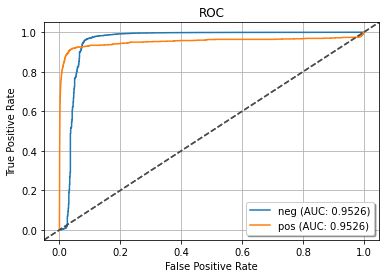

In [115]:
print('Train ROC')
plcls.plot_roc(ev, class_index=[0, 1], wait=True)

[[15542.    83.]
 [  118.   257.]]

Correctly Classified Instances       15799               98.7438 %
Incorrectly Classified Instances       201                1.2563 %
Kappa statistic                          0.7125
Mean absolute error                      0.016 
Root mean squared error                  0.1016
Relative absolute error                 34.8486 %
Root relative squared error             67.1775 %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.995    0.315    0.992      0.995    0.994      0.713    0.956     0.997     neg
                 0.685    0.005    0.756      0.685    0.719      0.713    0.956     0.718     pos
Weighted Avg.    0.987    0.307    0.987      0.987    0.987      0.713    0.956     0.990     

Test ROC


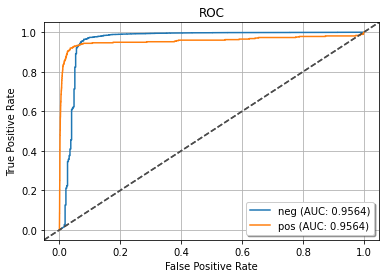

In [116]:
ev = Evaluation(weka_test)
ev.crossvalidate_model(lmt, weka_test, 5, Random(0))

print(ev.confusion_matrix)
print(ev.summary())
print(ev.class_details())

print('Test ROC')
plcls.plot_roc(ev, class_index=[0, 1], wait=True)

### (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train a Logistic Model Tree using the pre-processed data and repeat 2e. 

In [117]:
smote = SMOTE(random_state=0)
smX_train, smy_train = smote.fit_sample(X_train,y_train)
smX_train_df = pd.DataFrame(smX_train)
smy_train_df = pd.DataFrame(smy_train)
smote_train = pd.concat([smX_train_df, smy_train_df], axis=1, ignore_index=True)
smote_train.to_csv('../data/smote_train.csv',index=False)

smX_test, smy_test = smote.fit_sample(X_test,y_test)
smX_test_df = pd.DataFrame(smX_test)
smy_test_df = pd.DataFrame(smy_test)
smote_test = pd.concat([smX_test_df, smy_test_df], axis=1, ignore_index=True)
smote_test.to_csv('../data/smote_test.csv',index=False)

smote_tr_set = converters.load_any_file("../data/smote_train.csv")
smote_tr_set.class_is_last()
smote_te_set = converters.load_any_file("../data/smote_test.csv")
smote_te_set.class_is_last()

In [124]:
jvm.stop()
jvm.start(max_heap_size="2048m")
ev = Evaluation(smote_tr_set)
ev.crossvalidate_model(lmt, smote_tr_set, 2, Random(0))

print(ev.confusion_matrix)
print(ev.summary())
print(ev.class_details())

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/javabridge/jars/runnablequeue.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/javabridge/jars/cpython.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/python-weka-wrapper.jar', '/Users/smedlang/opt/anaconda2/envs/py37/lib/python3.7/site-packages/weka/lib/weka.jar', '/Users/smedlang/opt/anaconda2/envs/py37/li

[[57813.  1187.]
 [  373. 58627.]]

Correctly Classified Instances      116440               98.678  %
Incorrectly Classified Instances      1560                1.322  %
Kappa statistic                          0.9736
Mean absolute error                      0.0206
Root mean squared error                  0.106 
Relative absolute error                  4.1217 %
Root relative squared error             21.1955 %
Total Number of Instances           118000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.980    0.006    0.994      0.980    0.987      0.974    0.995     0.995     neg
                 0.994    0.020    0.980      0.994    0.987      0.974    0.995     0.991     pos
Weighted Avg.    0.987    0.013    0.987      0.987    0.987      0.974    0.995     0.993     



Training ROC


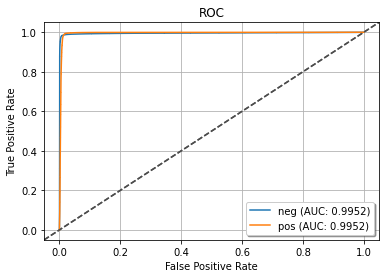

In [125]:
print('Training ROC')
plcls.plot_roc(ev, class_index=[0, 1], wait=True)

[[15340.   285.]
 [  245. 15380.]]

Correctly Classified Instances       30720               98.304  %
Incorrectly Classified Instances       530                1.696  %
Kappa statistic                          0.9661
Mean absolute error                      0.0282
Root mean squared error                  0.1169
Relative absolute error                  5.6314 %
Root relative squared error             23.3828 %
Total Number of Instances            31250     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.982    0.016    0.984      0.982    0.983      0.966    0.995     0.996     neg
                 0.984    0.018    0.982      0.984    0.983      0.966    0.996     0.993     pos
Weighted Avg.    0.983    0.017    0.983      0.983    0.983      0.966    0.995     0.994     

Test ROC


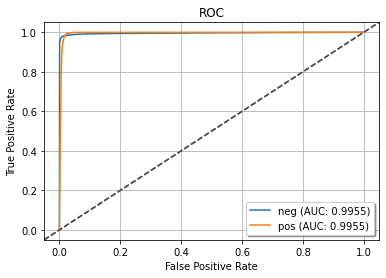

In [126]:
ev = Evaluation(smote_te_set)
ev.crossvalidate_model(lmt, smote_te_set, 2, Random(0))

print(ev.confusion_matrix)
print(ev.summary())
print(ev.class_details())

print('Test ROC')
plcls.plot_roc(ev, class_index=[0, 1], wait=True)

jvm.stop()



### 3. ISLR 6.8.3

Ridge Regression

a) iii, Training RSS increases because we are 'underfitting' to the training data in the attempts of achieving a lower Test RSS

b) ii - A certain s value will achieve the lowest Test RSS, then it will start increasing when it becomes too underfit to the data

c) iv - Ridge method decreases variance at the expense of bias

d) iii - Ridge method of regularization increases bias

e) v - irreducible error cannot be changed by our models


### 4. ISLR 6.8.5


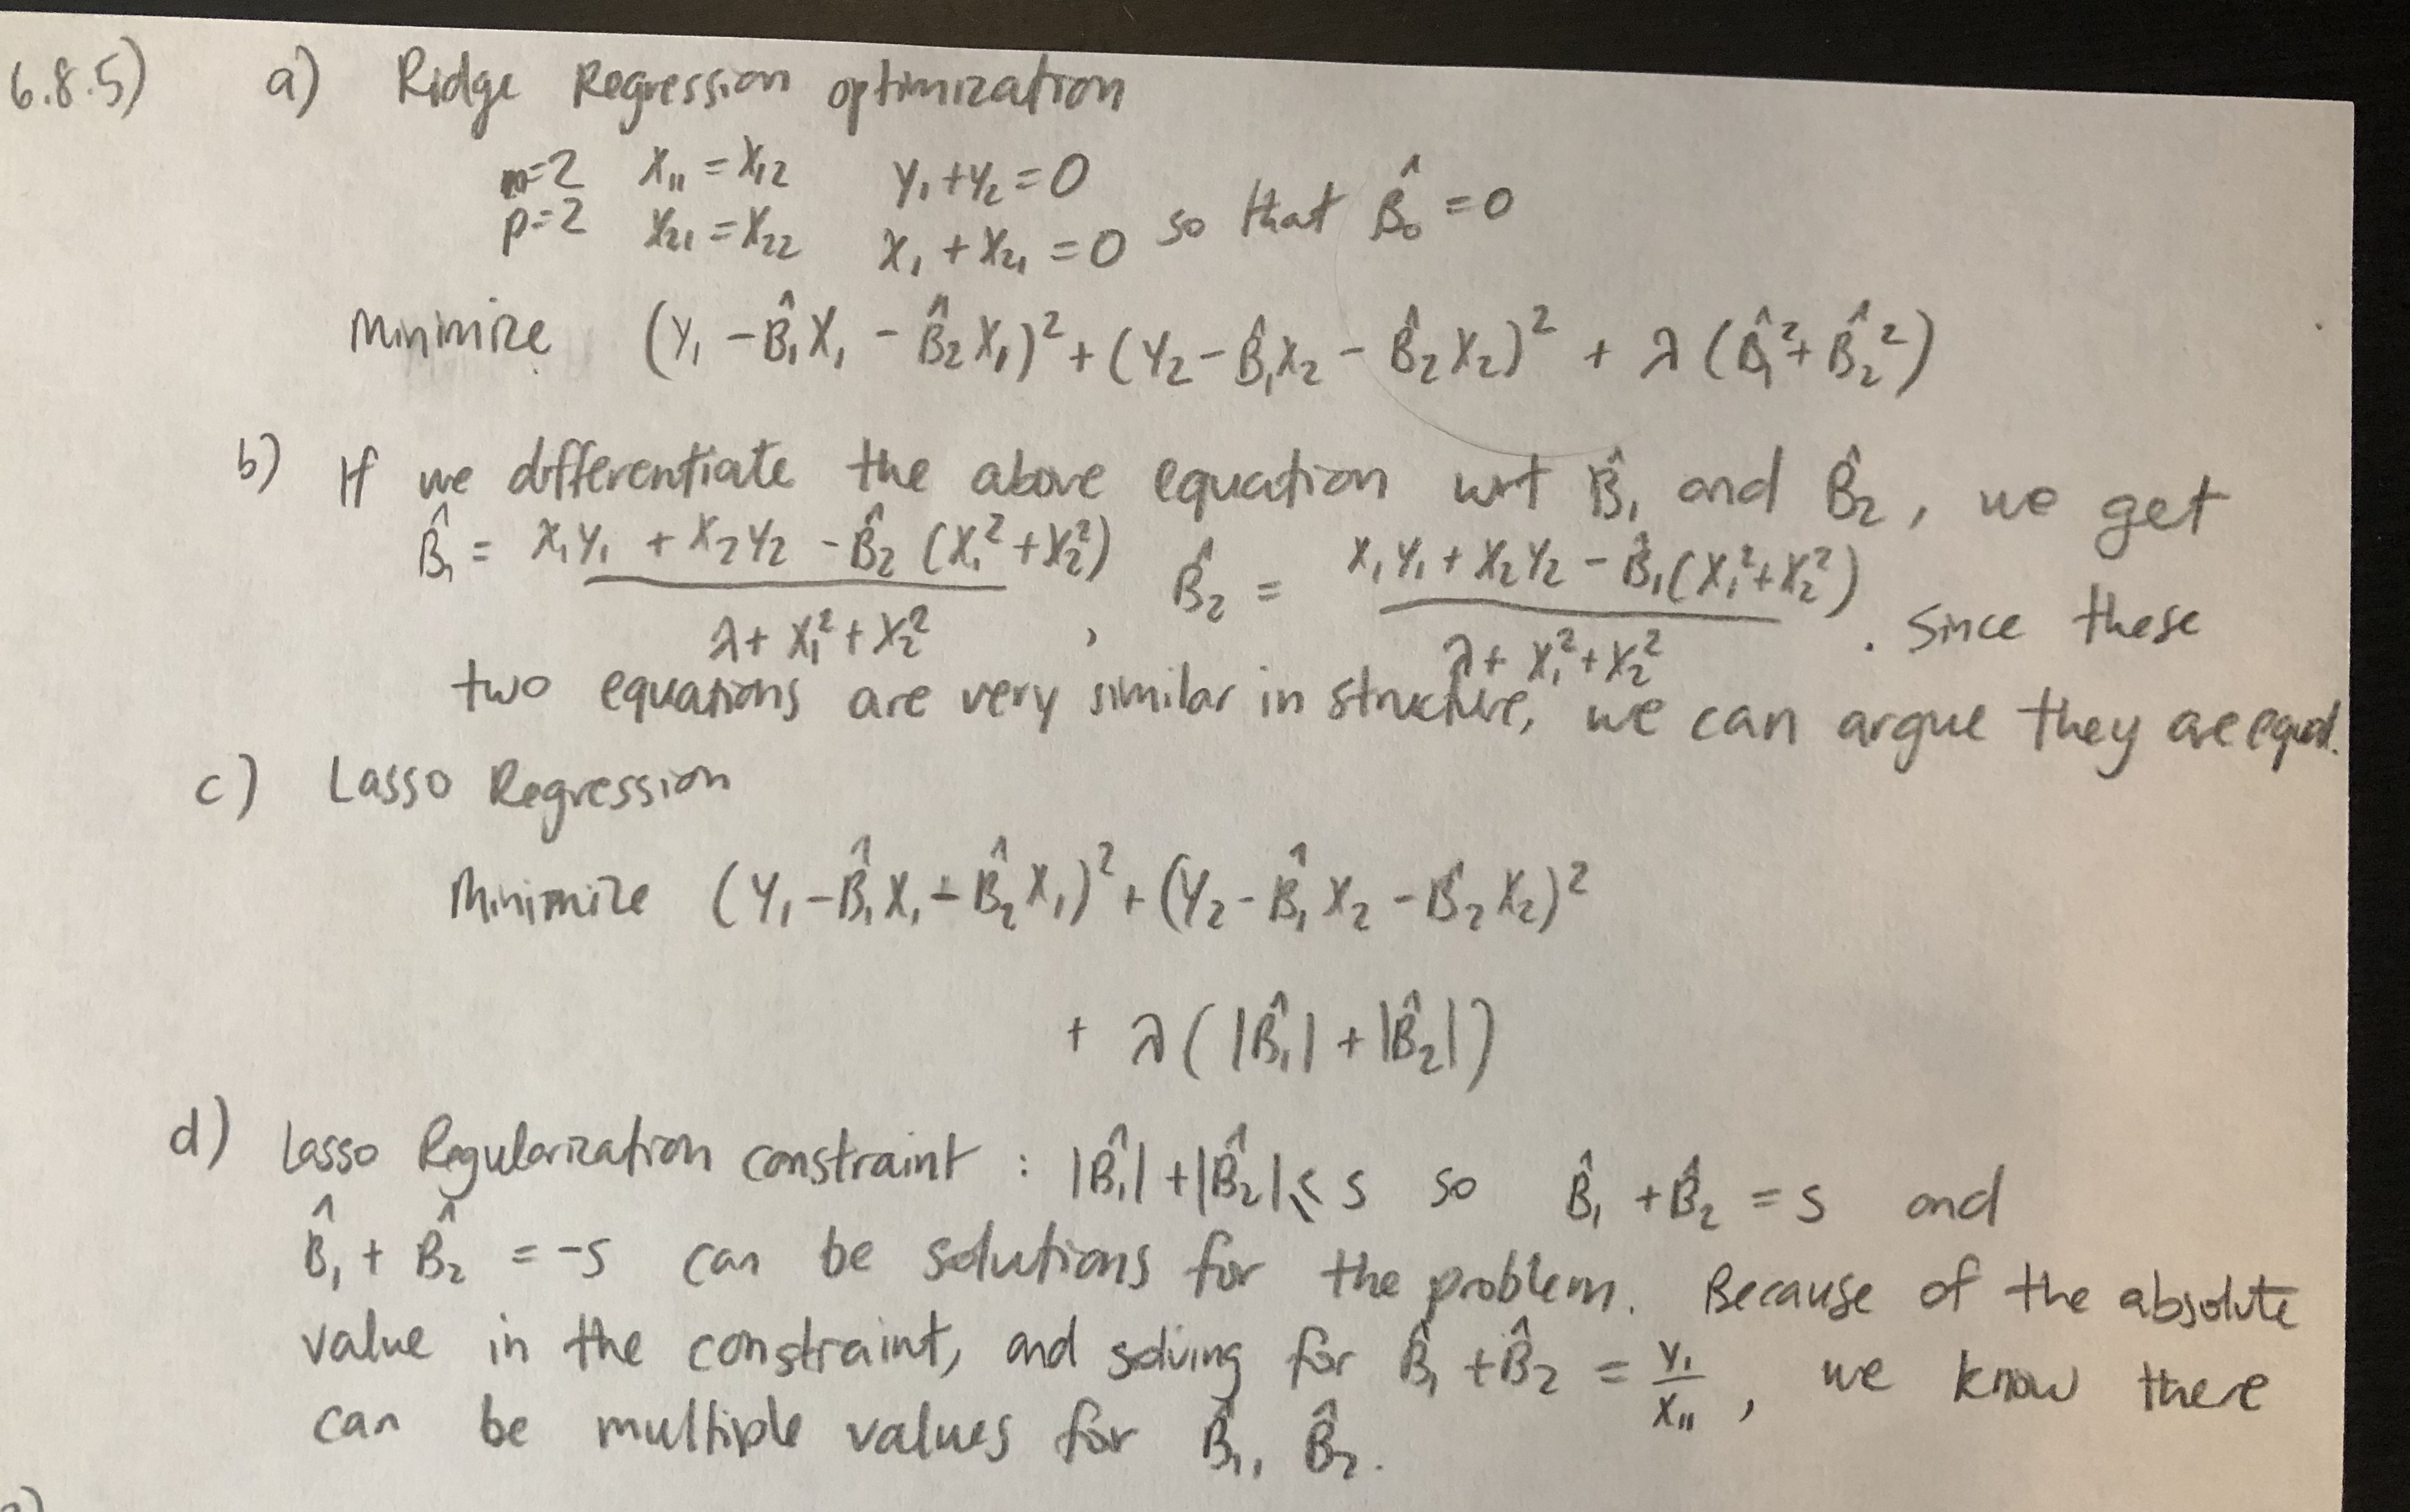

In [133]:
from IPython.display import Image
Image(filename="../data/islr685.JPG", width = 600, height = 300)

### 5. ISLR 8.4.5

Using the average probability approach, we get P(Class is Red|X) = 0.45, so we would classify X as Green. 
using the majority vote approach, we get P(Class is Red|X) = 0.6, so we class X as Red

### 6. ISLR 9.7.3


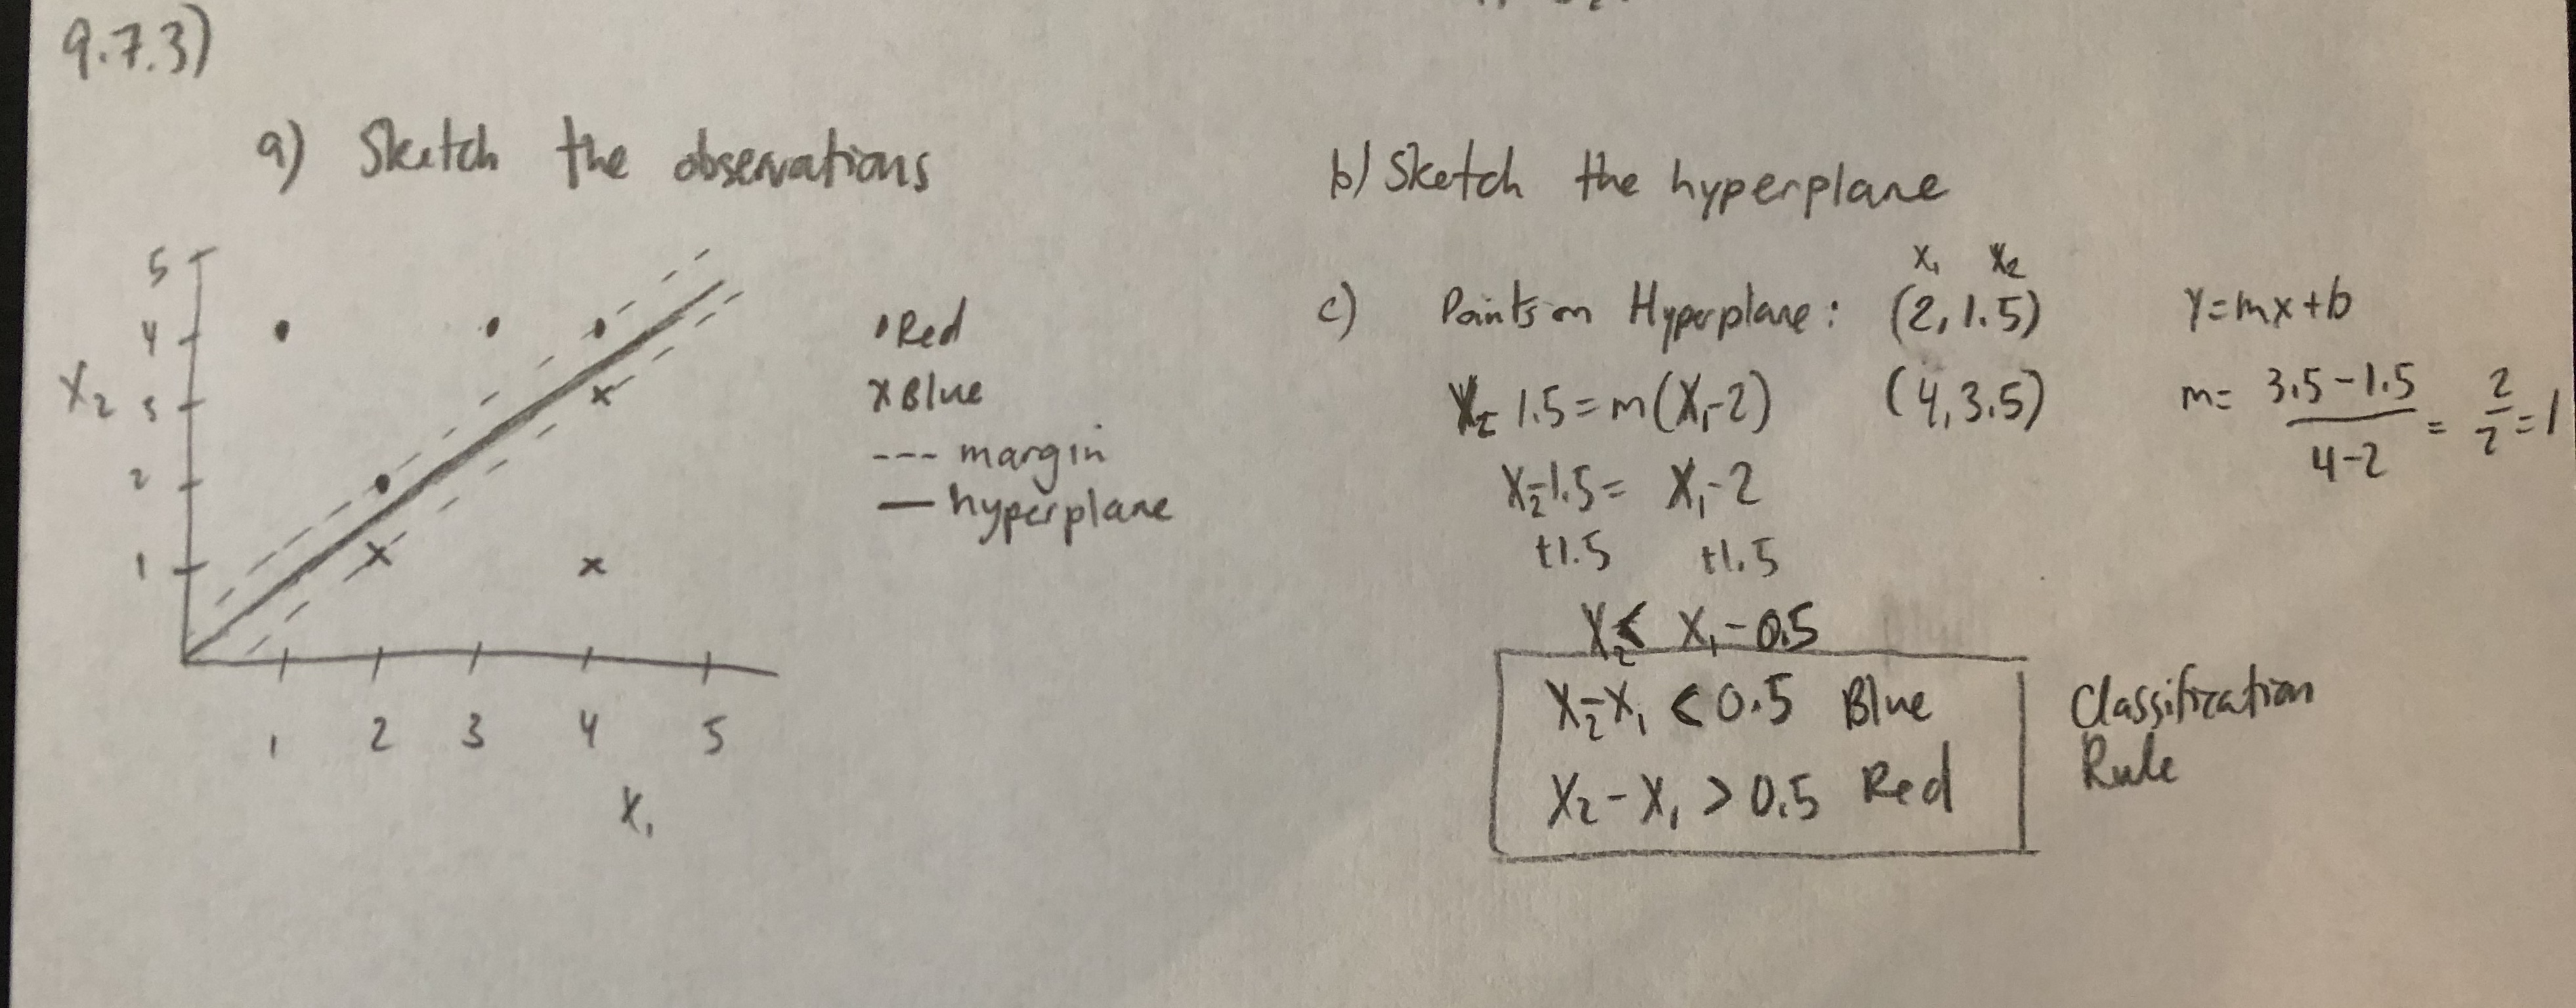

In [132]:
Image(filename="../data/islr973.JPG", width = 600, height = 300)
